# Tilt shift effect

I've challenged myself to create the tilt shift effect in python using nothing but morphological operations without searching up how to do it, and this notebook shows the the outcome of this.

My approach was blurring the provided image in three different intencities, and then getting horizontal sections of each one and adding them over the original image.

I'm aware this might not be the best - or correct - approach (as the blurring does not 'fade in', but rather 'steps in'). This is what I could come up by myself, since the Gaussian Filter method of scipy.ndImage does not provide a masking option.

Original image:


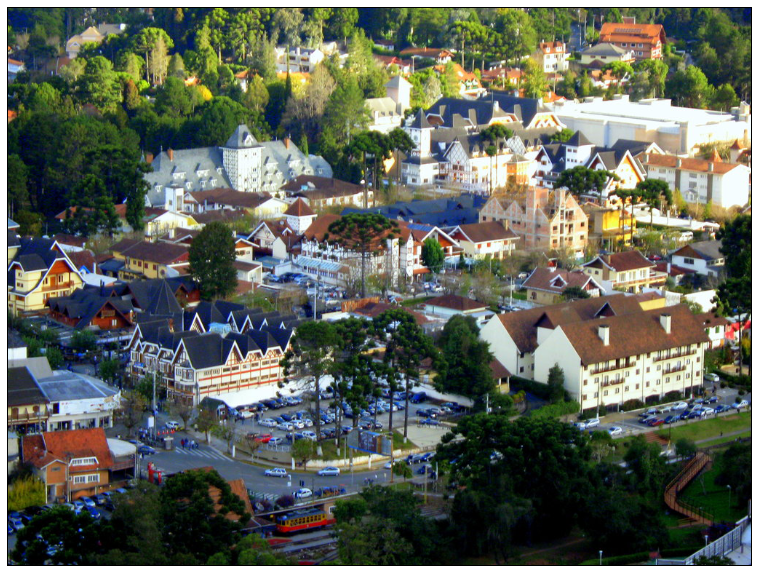

In [209]:
import scipy.ndimage
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

def plotImage(image):
    plt.figure(figsize=(20,10))
    imagePlotting = plt.imshow(image)
    imagePlotting.axes.get_xaxis().set_visible(False)
    imagePlotting.axes.get_yaxis().set_visible(False)
    plt.show()


cityOriginal = scipy.ndimage.imread("images/town.jpg")

print("Original image:")
plotImage(cityOriginal)

**Gaussian Filter**

Since Gaussian Filters (blurring) can only be applied to one channel at a time, I apply it to Red, Green and Blue separately, then put them back together in a pixel array (ndImage) and plot it.

Blurs

		  WEAK  				   MEDIUM  				      STRONG


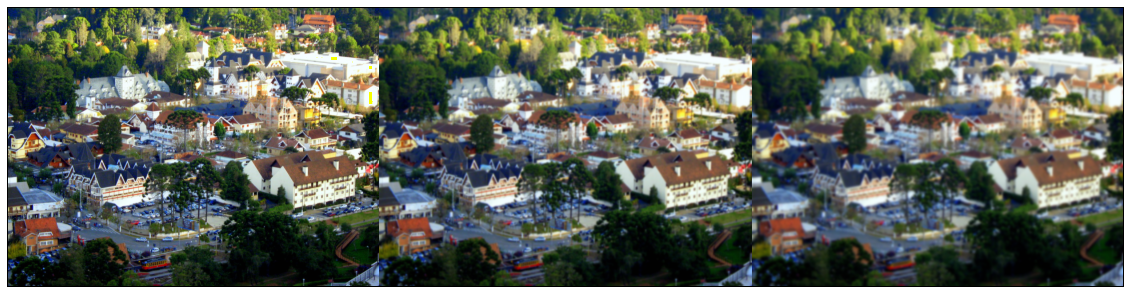

In [210]:
def getBlurredImage(image, strength):

    image_R = scipy.ndimage.gaussian_filter(image.T[0], sigma=strength)
    image_G = scipy.ndimage.gaussian_filter(image.T[1], sigma=strength)
    image_B = scipy.ndimage.gaussian_filter(image.T[2], sigma=strength)

    mergedCity = [255-image_R, 255-image_G, 255-image_B]

    return numpy.asarray(mergedCity).T.tolist()

#Create the three degrees of blurring
cityBlurredWeak = numpy.array(getBlurredImage(cityOriginal, strength=1))
cityBlurredMedium = numpy.array(getBlurredImage(cityOriginal, strength=2))
cityBlurredStrong = numpy.array(getBlurredImage(cityOriginal, strength=3))

#Show the three blurring degrees
images = numpy.zeros([len(cityOriginal[0])*3, len(cityOriginal),3]);

def copyIntoArray(origin, target, fromX, toX):
    target[...,0][fromX:toX] = origin.T[0,...]
    target[...,1][fromX:toX] = origin.T[1,...]
    target[...,2][fromX:toX] = origin.T[2,...]

copyIntoArray(cityBlurredWeak, images, 0, len(cityOriginal[0]))
copyIntoArray(cityBlurredMedium, images, len(cityOriginal[0]), len(cityOriginal[0])*2)
copyIntoArray(cityBlurredStrong, images, len(cityOriginal[0])*2, len(cityOriginal[0])*3)

images = images.transpose(1,0,2)

print('Blurs\n')
print('\t\t  WEAK  \t\t\t\t   MEDIUM  \t\t\t\t      STRONG')
plotImage(images)

Final result:


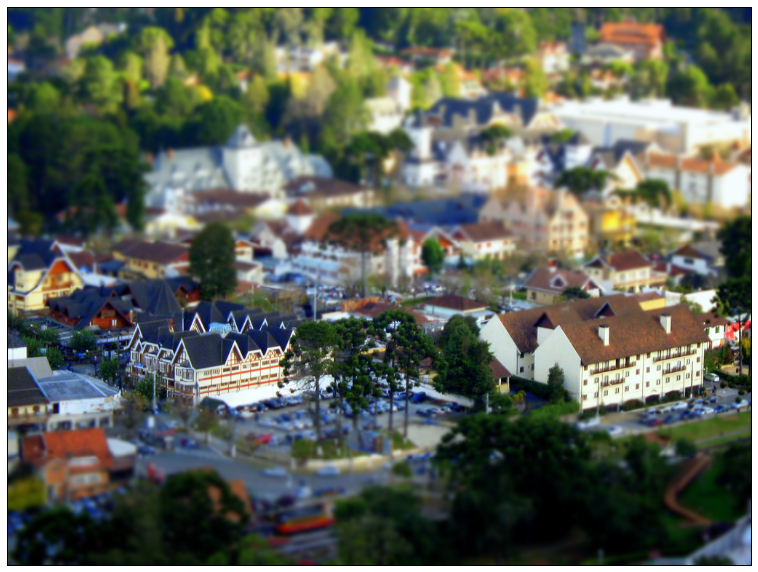

In [211]:
cityTiltshift = cityOriginal.copy()

def copySection(fromImage, toImage, begin, end):
    beginPixel = 0 if begin == 0 else int(len(toImage) * (begin/100))
    endPixel = int(len(toImage) * (end/100))
    toImage[beginPixel:endPixel] = 255-fromImage[beginPixel:endPixel]

dummeh = numpy.zeros([len(cityOriginal), len(cityOriginal[0]),3]);

#[from-to] Vertical percentages at which the blurred image sections will be inserted
copySection(cityBlurredStrong, cityTiltshift, 0,  42)
copySection(cityBlurredMedium, cityTiltshift, 42, 50)
copySection(cityBlurredWeak,   cityTiltshift, 50, 56)
copySection(cityBlurredWeak,   cityTiltshift, 70, 76)
copySection(cityBlurredMedium, cityTiltshift, 73, 81)
copySection(cityBlurredStrong, cityTiltshift, 81, 100)

print("Final result:")
plotImage(cityTiltshift)